In [88]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [89]:
file = "Resources/myopia.csv"

In [90]:
df = pd.read_csv(file)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [91]:
# Features of the dataset
df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY', 'MYOPIC'],
      dtype='object')

In [92]:
df["MYOPIC"].value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [93]:
# Remove the "MYOPIC" column from dataset
df2 = df.drop(columns=["MYOPIC"], axis=1)
labels = df["MYOPIC"]
df2.head()


,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [94]:
# Standarize data with StandarScaler
df2_scaled = StandardScaler().fit_transform(df2)
print(df2_scaled[0:5])


[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]]


### PART 2: Apply Dimensionality Reduction

In [95]:
# Perform dimensionality reduction with PCA. How did the number of the features change?

# Initialize PCA model: Preserve 90% of the explained variance in dimensionality reduction.
pca = PCA(n_components=0.90)

# Get the principal components for the df2_scaled data.
df2_pca = pca.fit_transform(df2_scaled)

# Get the explained variance ratio
pca.explained_variance_ratio_.sum()


0.9187361702915186

In [96]:
# Get the shape of features after reduction
df2_pca.shape

(618, 10)

In [97]:
# Reduce the dataset dimensions with t-SNE and visually inspect the results. 
# To do this, run t-SNE on the principal components, which is the output of the PCA transformation.

tsne = TSNE(learning_rate=250)

In [98]:
tsne_features = tsne.fit_transform(df2_pca)

In [99]:
tsne_features.shape

(618, 2)

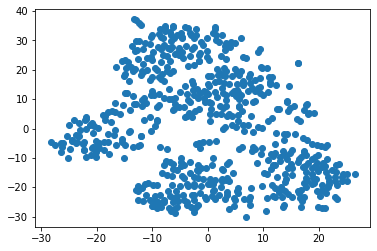

In [100]:
# Prepare to plot the dataset to visualize the clusters
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()




In [101]:
labels.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

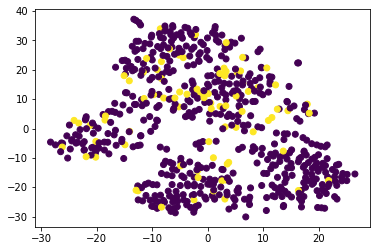

In [102]:
# Results colored by target value
# t-SNE is not good at clustering the data, this is why we have to borrow the labels
# from the original dataset
# At least is good at dividing the groups

plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
plt.show()


### Part 3: Perform a Cluster Analysis with K-means

In [105]:
inertia = []
# Same as k = list(range(1, 11))
#k = [1,2,3,4,5,6,7,8,9,10]
k=[i for i in range(1,11)]

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df2_pca)
    inertia.append(km.inertia_)           # each inertia is calculated by km.inertia

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)


c:\Users\jlper\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


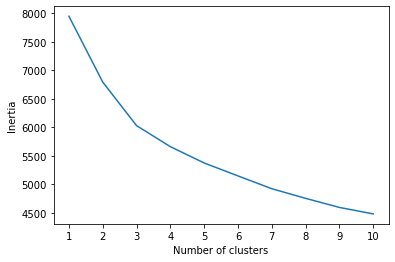

In [106]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [8]:
normalized = normalize(df)


In [5]:
mergings = linkage(normalized, method="ward")

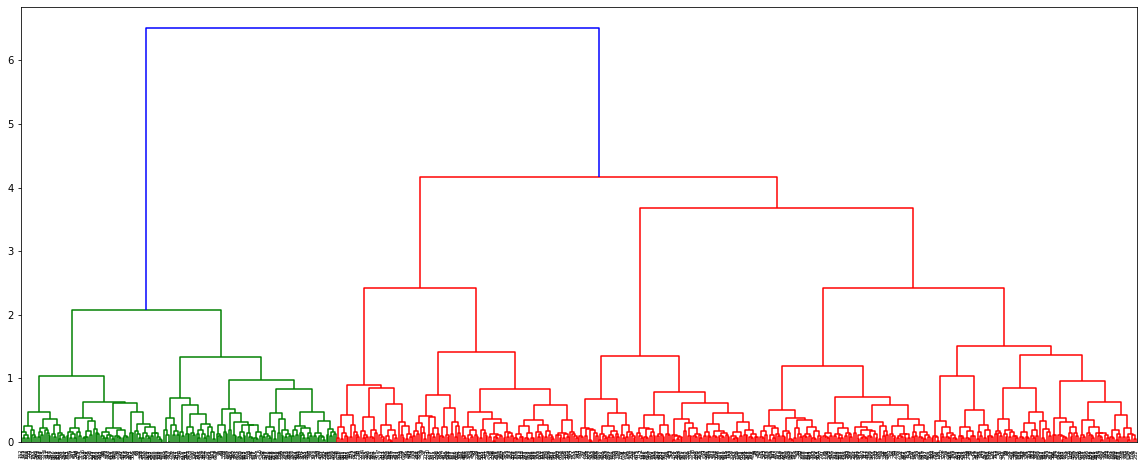

In [6]:
plt.figure(figsize=(20,8))

dendrogram(mergings,
          leaf_rotation=90,
          leaf_font_size=5)

plt.show()

In [7]:
df2 = pd.DataFrame(normalized)
df2.columns = df.columns

In [8]:
cluster = AgglomerativeClustering(
    n_clusters=2,
    affinity="euclidean",
    linkage="ward"
)
labels = cluster.fit_predict(df2)

In [9]:
labels[:5]

array([0, 0, 0, 1, 0])